In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px

In [3]:
df = pd.read_excel(r"C:\Users\HM\Desktop\1730285881-Airbnb_Open_Data.xlsx")

##Access Data

In [5]:
df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,193.0,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,28.0,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,124.0,3.0,0.0,NaT,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,74.0,30.0,270.0,2019-07-05,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,41.0,10.0,9.0,2018-11-19,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              102599 non-null  int64         
 1   NAME                            102329 non-null  object        
 2   host id                         102599 non-null  int64         
 3   host_identity_verified          102310 non-null  object        
 4   host name                       102191 non-null  object        
 5   neighbourhood group             102570 non-null  object        
 6   neighbourhood                   102583 non-null  object        
 7   lat                             102591 non-null  float64       
 8   long                            102591 non-null  float64       
 9   country                         102067 non-null  object        
 10  country code                    102468 non-null  object 

In [5]:
df.duplicated().value_counts()

False    102058
True        541
Name: count, dtype: int64

In [6]:
# neighbourhood group " brrokln" instead of broolyn
df[df["neighbourhood group"]=="brookln"]

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
13,1008516,"Lovely Room 1, Garden, Best Area, Legal rental",26802410424,verified,Darcy,brookln,South Slope,40.66829,-73.98779,United States,...,116.0,4.0,167.0,2019-06-24,1.34,4.0,3.0,47.0,NaN,NaN


In [7]:
print(df.columns)

Index(['id', 'NAME', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365', 'house_rules', 'license'],
      dtype='object')


In [6]:
# Step 1: Drop any duplicate rows
df.drop_duplicates(inplace = True)

# Step 2: Drop rows that have any missing values
df.dropna(inplace = True)

# Step 3: Convert columns to their correct data types
# Note: The string cleaning steps for price/service fee are removed as they are not needed.
df['price'] = df['price'].astype(float)
df['service fee'] = df['service fee'].astype(float)
df['host id'] = df['host id'].astype(int)
df['last review'] = pd.to_datetime(df['last review'])
df['Construction year'] = df['Construction year'].astype(int)

# You can print the info to see the results of your cleaning
print("Data cleaning complete! Here are the new data types:")
print(df.info())

Data cleaning complete! Here are the new data types:
<class 'pandas.core.frame.DataFrame'>
Index: 1 entries, 11114 to 11114
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              1 non-null      int64         
 1   NAME                            1 non-null      object        
 2   host id                         1 non-null      int64         
 3   host_identity_verified          1 non-null      object        
 4   host name                       1 non-null      object        
 5   neighbourhood group             1 non-null      object        
 6   neighbourhood                   1 non-null      object        
 7   lat                             1 non-null      float64       
 8   long                            1 non-null      float64       
 9   country                         1 non-null      object        
 10  country code          

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1 entries, 11114 to 11114
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              1 non-null      int64         
 1   NAME                            1 non-null      object        
 2   host id                         1 non-null      int64         
 3   host_identity_verified          1 non-null      object        
 4   host name                       1 non-null      object        
 5   neighbourhood group             1 non-null      object        
 6   neighbourhood                   1 non-null      object        
 7   lat                             1 non-null      float64       
 8   long                            1 non-null      float64       
 9   country                         1 non-null      object        
 10  country code                    1 non-null      object        
 11  instant

In [10]:
#eda exploratory data analysis 


In [11]:
df.describe()

,id,host id,lat,long,instant_bookable,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
count,1.0,1.000000e+00,1.00000,1.00000,1.0,1.0,1.0,1.0,1.0,1.0,1,1.00,1.0,1.0,1.0
mean,7139598.0,7.302318e+10,40.71764,-73.95689,1.0,2010.0,702.0,140.0,1.0,1.0,2016-01-03 00:00:00,0.02,1.0,1.0,191.0
min,7139598.0,7.302318e+10,40.71764,-73.95689,1.0,2010.0,702.0,140.0,1.0,1.0,2016-01-03 00:00:00,0.02,1.0,1.0,191.0
25%,7139598.0,7.302318e+10,40.71764,-73.95689,1.0,2010.0,702.0,140.0,1.0,1.0,2016-01-03 00:00:00,0.02,1.0,1.0,191.0
50%,7139598.0,7.302318e+10,40.71764,-73.95689,1.0,2010.0,702.0,140.0,1.0,1.0,2016-01-03 00:00:00,0.02,1.0,1.0,191.0
75%,7139598.0,7.302318e+10,40.71764,-73.95689,1.0,2010.0,702.0,140.0,1.0,1.0,2016-01-03 00:00:00,0.02,1.0,1.0,191.0
max,7139598.0,7.302318e+10,40.71764,-73.95689,1.0,2010.0,702.0,140.0,1.0,1.0,2016-01-03 00:00:00,0.02,1.0,1.0,191.0
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
property_types = df["room type"].value_counts().to_frame()
property_types

,count
room type,
Private room,1


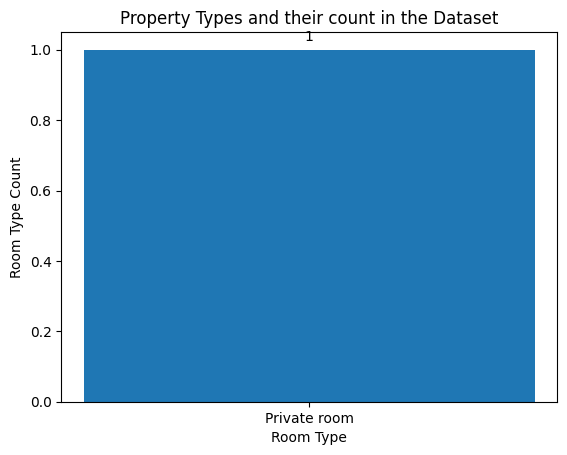

In [8]:
df.drop_duplicates(inplace=True)

# Define a list of essential columns for your analysis
essential_columns = ['NAME', 'host name', 'price', 'service fee', 'room type']

# Drop rows ONLY IF they have missing values in this specific subset of columns
df.dropna(subset=essential_columns, inplace=True)

# --- THE REST OF YOUR CODE (No changes needed) ---
property_types = df['room type'].value_counts().to_frame(name='count')

room_type_bar = plt.bar(property_types.index, property_types.loc[:,"count"]);
plt.bar_label(room_type_bar, labels = property_types.loc[:,"count"], padding = 4);
plt.xlabel('Room Type');
plt.ylabel('Room Type Count');
plt.title('Property Types and their count in the Dataset');
plt.show()

In [9]:
hood_group = df['neighbourhood group'].value_counts().to_frame()
hood_group

,count
neighbourhood group,
Brooklyn,1


Text(0.5, 1.0, 'highest neighbourhood listing')

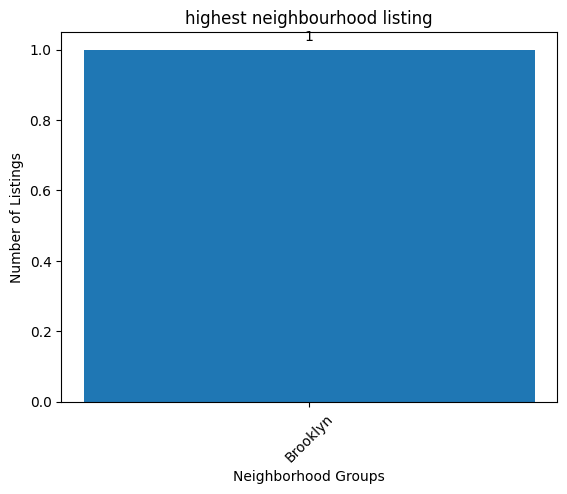

In [10]:
#[viz] which neighborhood group has the highest number of listings?
hood_group_bar = plt.bar(hood_group.index, hood_group.loc[:,'count']);
plt.bar_label(hood_group_bar, labels = hood_group.loc[:,'count'], padding = 4 );
plt.xlabel('Neighborhood Groups');
plt.ylabel('Number of Listings');
plt.xticks(rotation = 45);
plt.title("highest neighbourhood listing")

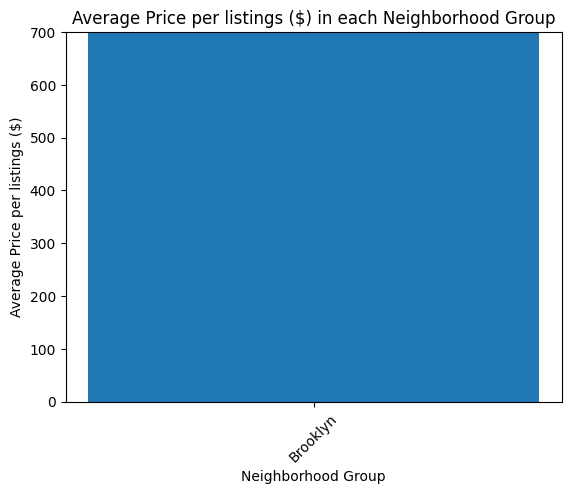

In [11]:
#[viz] Which neighborhoods group have the highest average prices for Airbnb listings?
avg_price = df.groupby('neighbourhood group')['price'].mean().sort_values(ascending = False).to_frame()
avg_price_bar = plt.bar(avg_price.index, avg_price.loc[:,'price']);
plt.bar_label(avg_price_bar, labels = round(avg_price.loc[:,'price'],2), label_type = 'edge', padding = 4 );
plt.ylim((0,700));
plt.ylabel('Average Price per listings ($)');
plt.xlabel('Neighborhood Group');
plt.xticks(rotation = 45);
plt.title('Average Price per listings ($) in each Neighborhood Group');

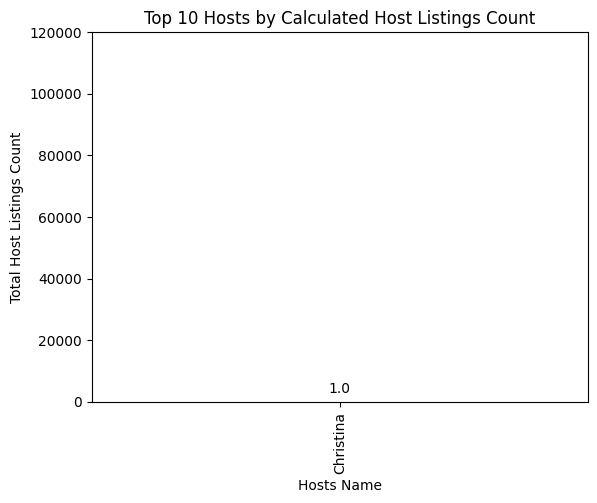

In [12]:
#[viz] who are the top 10 hosts by calculated host listing count?
hosts = df.groupby('host name')['calculated host listings count'].mean().sort_values(ascending = False).nlargest(10).to_frame()
hosts_bar = plt.bar(hosts.index, hosts.loc[:,'calculated host listings count']);
plt.bar_label(hosts_bar, labels = hosts.loc[:,'calculated host listings count'], label_type = 'edge', padding = 4 );
plt.ylabel('Total Host Listings Count');
plt.xlabel('Hosts Name');
plt.xticks(rotation = 90);
plt.ylim(0, 120000);
plt.title('Top 10 Hosts by Calculated Host Listings Count');

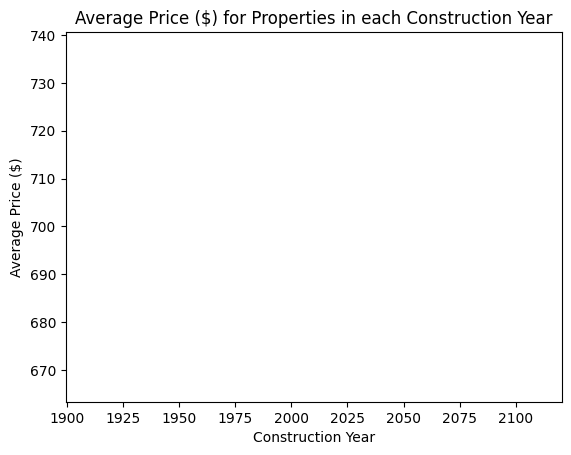

In [13]:
#[viz] Is there a relationship between the construction year of property and price?
df.groupby('Construction year')['price'].mean().plot()
plt.ylabel('Average Price ($)');
plt.xlabel('Construction Year');
plt.title('Average Price ($) for Properties in each Construction Year');

In [14]:
#[viz] Are hosts with verified identities more likely to receive positive reviews?
review = df.groupby('host_identity_verified')['review rate number'].mean().sort_values(ascending = False).to_frame()
review

,review rate number
host_identity_verified,
verified,1.0


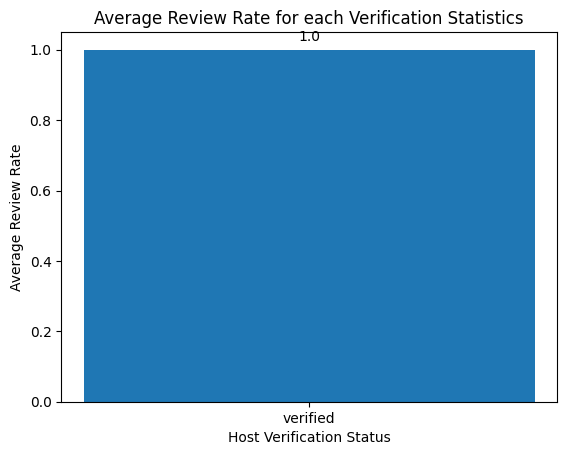

In [15]:
#[viz]
review_bar = plt.bar(review.index, review.loc[:,'review rate number']);
plt.bar_label(review_bar, labels = round(review.loc[:,'review rate number'],2), padding = 4);
plt.ylabel('Average Review Rate');
plt.xlabel('Host Verification Status');
plt.title('Average Review Rate for each Verification Statistics');

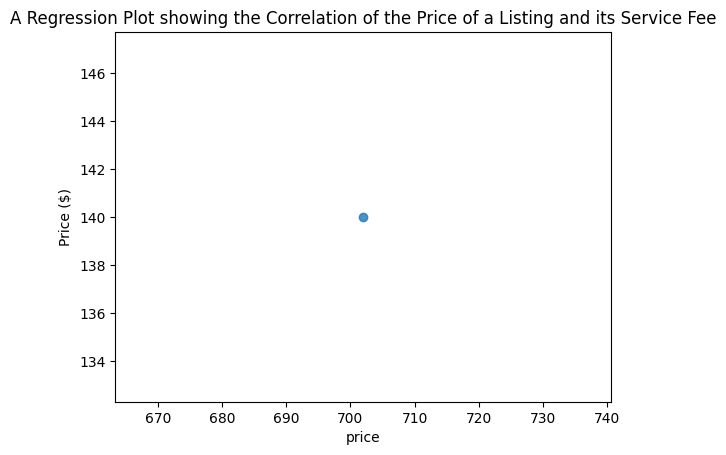

In [16]:
#[viz]
sns.regplot(x = 'price', y = 'service fee', data = df);
plt.ylabel('Price ($)');
plt.title('A Regression Plot showing the Correlation of the Price of a Listing and its Service Fee');

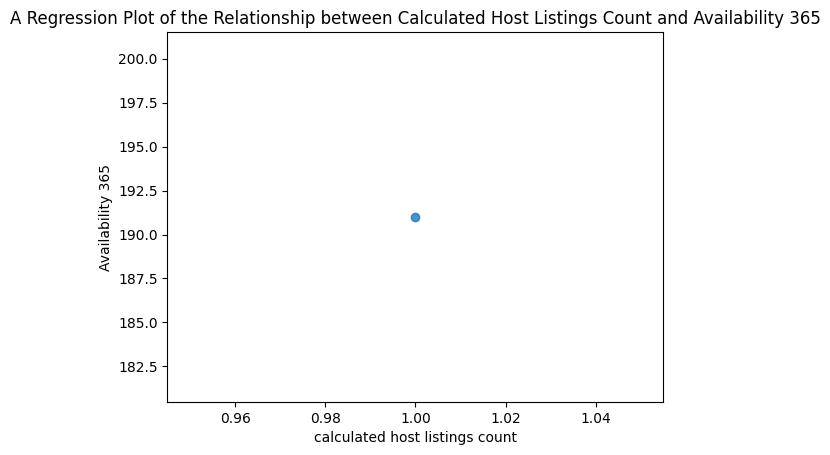

In [17]:
#[viz] Are hosts with a higher calculated host listings count more likely to maintain higher availability throughout the year?
sns.regplot(x = 'calculated host listings count', y = 'availability 365', data = df);
plt.ylabel('Availability 365');
plt.title('A Regression Plot of the Relationship between Calculated Host Listings Count and Availability 365');

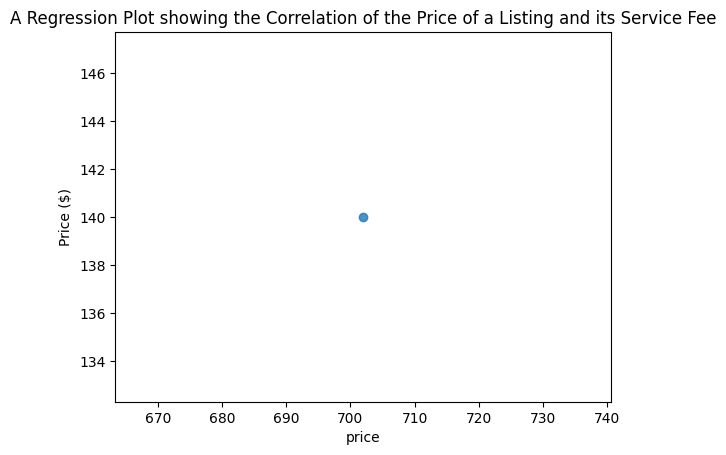

In [21]:
#[viz]
sns.regplot(x = 'price', y = 'service fee', data = df);
plt.ylabel('Price ($)');
plt.title('A Regression Plot showing the Correlation of the Price of a Listing and its Service Fee');

In [25]:
##The analysis of the New York City Airbnb dataset revealed important trends related to pricing, neighborhood popularity, and host verification. It found a strong correlation between the listing price and service fee. The project recommends using predictive modeling and machine learning in the future to forecast demand and pricing trends.